### Business Understanding

#### Problem Statement

A large child education toy company which sells edutainment tablets and gaming systems
both online and in retail stores wanted to analyze the customer data. They are operating
from last few years and maintaining all transactional information data. The given data
‘CustomerData.csv’ is a sample of customer level data extracted and processed for the
analysis from various set of transactional files.

The objectives of today’s activity are :
* Building a regression model to predict the customer revenue based on other factors and understand the influence of other attributes on revenue

### Identify right Error Metrics

##### Error Metrics for Regression

* Mean Absolute Error (MAE):

$$MAE = \dfrac{1}{n}\times\sum_{i = 1}^{n}|y_{i} - \hat{y_{i}}|$$


* Mean Squared Error (MSE):

$$MSE = \dfrac{1}{n}\times\sum_{i = 1}^{n}(y_{i} - \hat{y_{i}})^2$$


* Root Mean Squared Error (RMSE):

$$RMSE = \sqrt{\dfrac{1}{n}\times\sum_{i = 1}^{n}(y_{i} - \hat{y_{i}})^2}$$


* Mean Absolute Percentage Error (MAPE):

$$MAPE = \dfrac{100}{n}\times\dfrac{\sum_{i = 1}^{n}\mid y_{i} - \hat{y_{i}}\mid}{y_{i}}$$

#### Loading the required libraries

In [41]:
#pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [110]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import tree
from matplotlib import pyplot


from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sb

import graphviz

import seaborn as sns

import math

#### Loading the data

In [2]:
data = pd.read_csv("CustomerData.csv", header=0)

In [3]:
type(data)

pandas.core.frame.DataFrame

### Data Understanding

In [4]:
data.shape

(3209, 14)

Display the columns

In [5]:

data.columns

Index(['CustomerID', 'City', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild',
       'Tenure', 'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'FavoriteChannelOfTransaction',
       'FavoriteGame', 'TotalRevenueGenerated'],
      dtype='object')

In [6]:
data.index

RangeIndex(start=0, stop=3209, step=1)

See the top rows of the data

In [7]:
data.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


Shows a quick statistic summary of your data using Describe

In [8]:
data.describe(include='all')

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
count,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209,3209,3209.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favorite,Uniform,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2637,3083,NaN
mean,2605.000000,1.114054,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,NaN,NaN,168.477183
std,926.502833,0.317927,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,NaN,NaN,81.798528
min,1001.000000,1.000000,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,100.000000
25%,1803.000000,1.000000,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,NaN,NaN,116.640000
50%,2605.000000,1.000000,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,NaN,NaN,142.390000
75%,3407.000000,1.000000,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,NaN,NaN,191.250000


Display the data type of each of the variable

In [9]:
data.dtypes 

CustomerID                        int64
City                              int64
NoOfChildren                      int64
MinAgeOfChild                     int64
MaxAgeOfChild                     int64
Tenure                            int64
FrquncyOfPurchase                 int64
NoOfUnitsPurchased                int64
FrequencyOFPlay                   int64
NoOfGamesPlayed                   int64
NoOfGamesBought                   int64
FavoriteChannelOfTransaction     object
FavoriteGame                     object
TotalRevenueGenerated           float64
dtype: object

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MinAgeOfChild'>

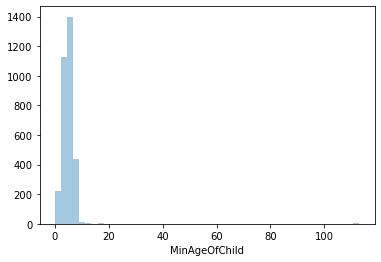

In [10]:
sb.distplot(data['MinAgeOfChild'],kde=False)


<AxesSubplot:xlabel='MaxAgeOfChild'>

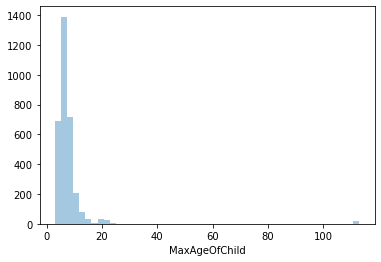

In [11]:
sb.distplot(data['MaxAgeOfChild'],kde=False)

<AxesSubplot:xlabel='Tenure'>

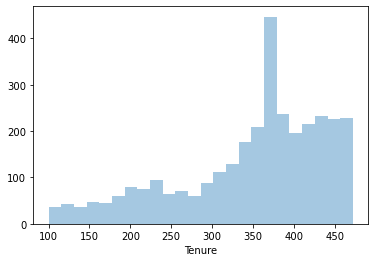

In [12]:
sb.distplot(data['Tenure'],kde=False)

### Data Preparation

#### Observations:
    1. City is interpreted as numeric (which is actually categorical) and FavouriteGame, FavouriteChannelOfTransaction are interpreted as objects.
    2. max age of children is 113 which must be a wrong entry
    3. Summary statistics for CustomerID is not meaningful

So we now change these appropriately i.e, convert city, favourite game and favourite channel to category, exclude customer id from the data for analysis and treat wrong entry records

##### Check and delete CustomerID attribute

In [13]:
np.size(np.unique(data.CustomerID, return_counts=True)[0])

3209

In [14]:
data.drop('CustomerID', axis=1, inplace=True)

#### Data type conversion 
    Using astype('category') convert 'City', 'FavoriteChannelOfTransaction', 'FavoriteGame' attributes to a categorical data type .

In [15]:
for col in ['City', 'FavoriteChannelOfTransaction', 'FavoriteGame']:
    data[col] = data[col].astype('category')

In [16]:
data.dtypes

City                            category
NoOfChildren                       int64
MinAgeOfChild                      int64
MaxAgeOfChild                      int64
Tenure                             int64
FrquncyOfPurchase                  int64
NoOfUnitsPurchased                 int64
FrequencyOFPlay                    int64
NoOfGamesPlayed                    int64
NoOfGamesBought                    int64
FavoriteChannelOfTransaction    category
FavoriteGame                    category
TotalRevenueGenerated            float64
dtype: object

<AxesSubplot:xlabel='FavoriteGame', ylabel='count'>

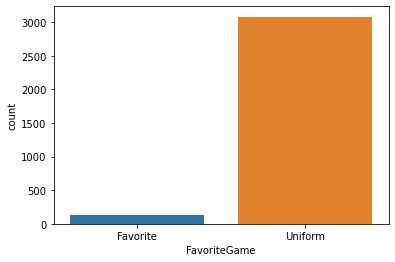

In [17]:
sb.countplot(x='FavoriteGame',data=data)

<AxesSubplot:xlabel='FavoriteChannelOfTransaction', ylabel='count'>

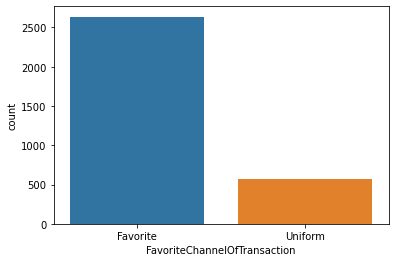

In [18]:
sb.countplot(x='FavoriteChannelOfTransaction',data=data)

<AxesSubplot:xlabel='City', ylabel='count'>

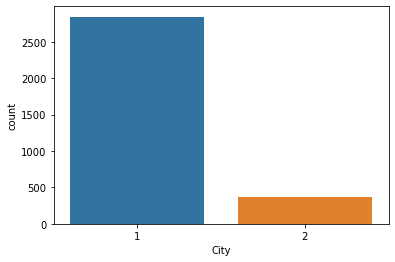

In [19]:
sb.countplot(x='City',data=data)

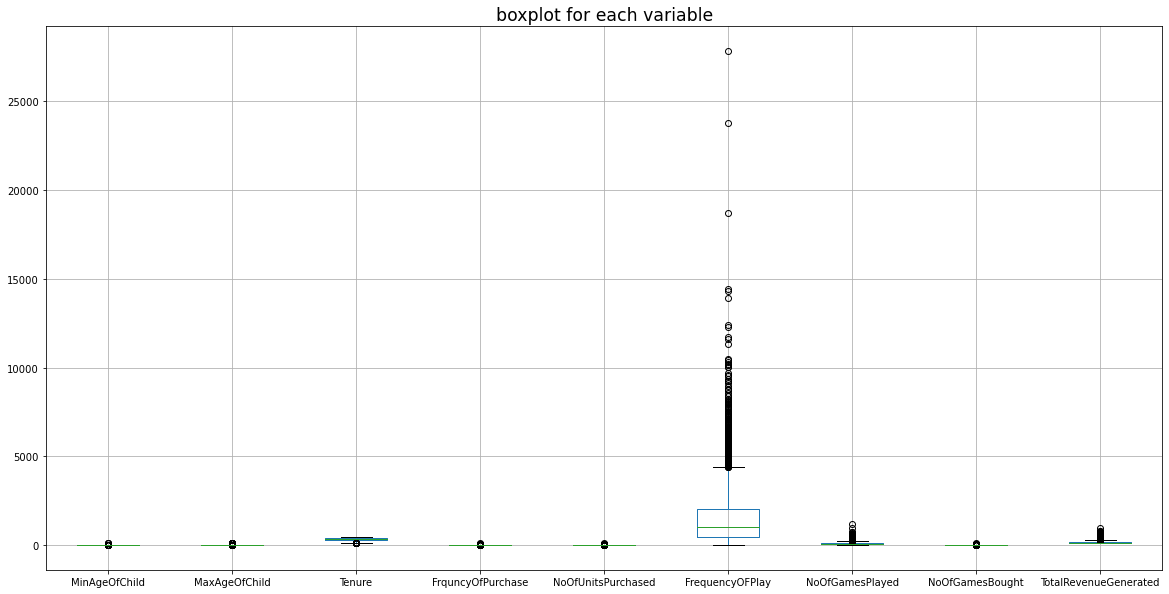

In [20]:
plt.figure(figsize = (20, 10))
data.iloc[:, 2:].boxplot()
plt.title('boxplot for each variable', fontsize = 'xx-large')
plt.show()

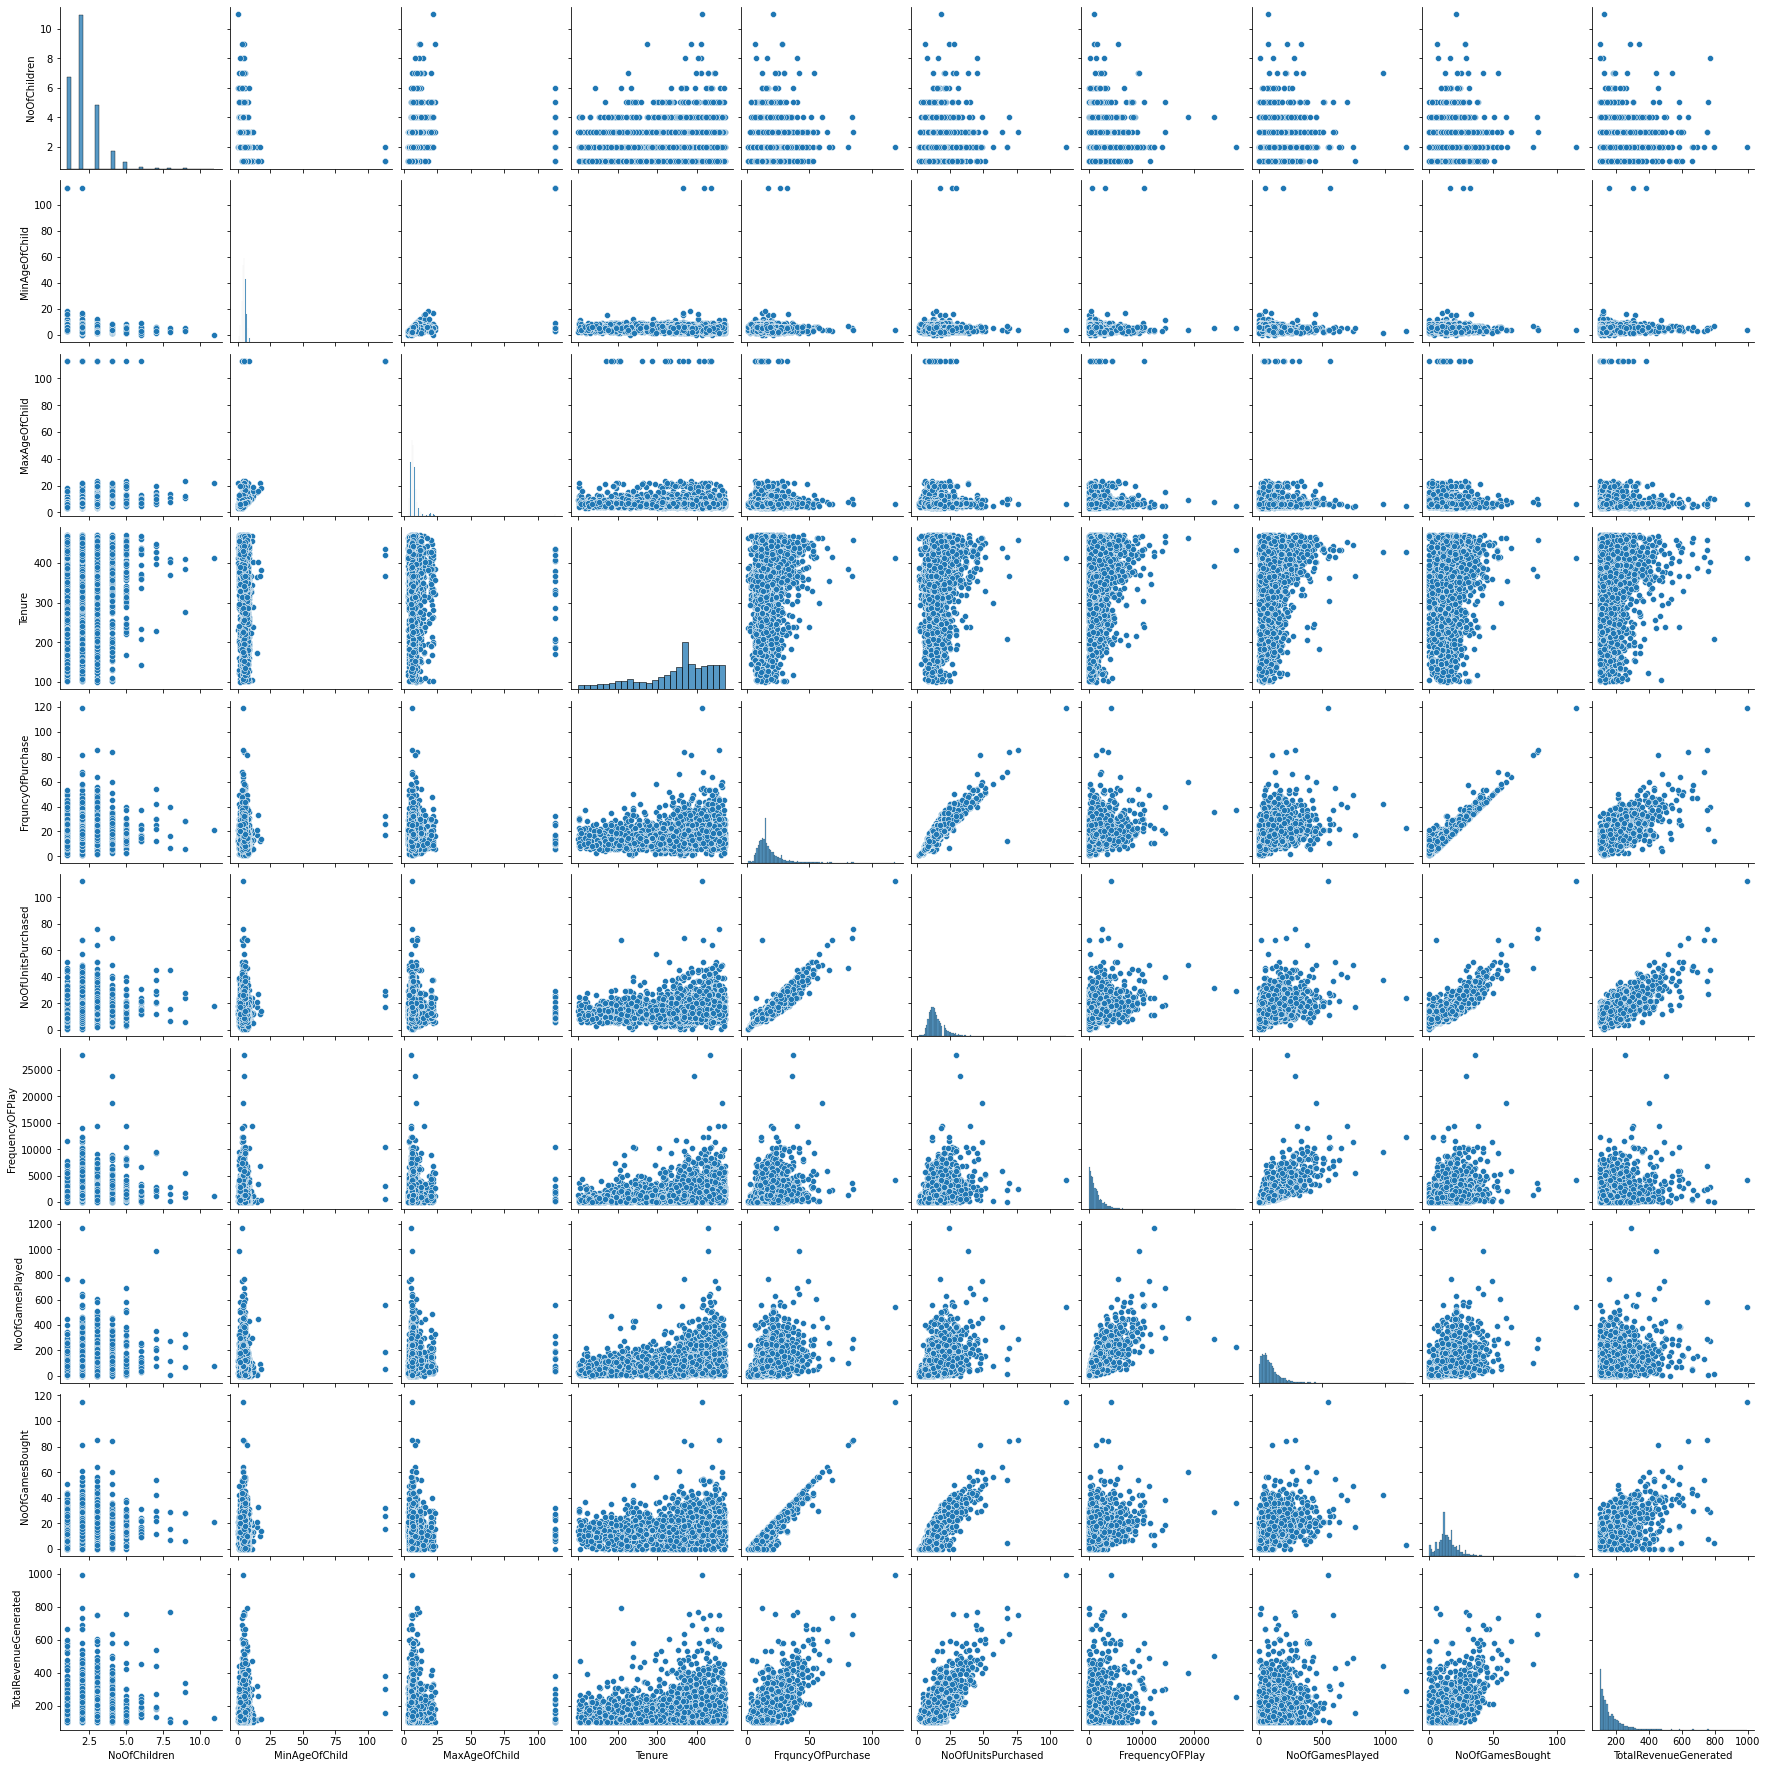

In [28]:
sb.pairplot(data=data)

In [21]:
data.describe(include='all')

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
count,3209.0,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209,3209,3209.000000
unique,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favorite,Uniform,NaN
freq,2843.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2637,3083,NaN
mean,NaN,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,NaN,NaN,168.477183
std,NaN,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,NaN,NaN,81.798528
min,NaN,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,100.000000
25%,NaN,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,NaN,NaN,116.640000
50%,NaN,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,NaN,NaN,142.390000
75%,NaN,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,NaN,NaN,191.250000


Observe how manu records have values 113 for age of children

In [22]:
data.loc[(data['MinAgeOfChild']==113) | (data['MaxAgeOfChild']==113),] #Only colon after comma implies consider all the rows

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
570,1,2,4,113,205,17,17,158,51,8,Favorite,Uniform,218.85
584,1,2,3,113,379,6,6,242,32,0,Favorite,Uniform,100.44
599,1,2,113,113,436,26,26,10502,562,26,Favorite,Uniform,300.00
804,1,3,6,113,286,6,6,2137,72,6,Favorite,Uniform,102.50
878,1,2,5,113,202,9,8,483,68,9,Favorite,Uniform,105.00
897,1,2,5,113,355,16,16,1700,142,10,Favorite,Uniform,270.00
1097,1,3,6,113,432,12,12,2261,194,12,Favorite,Uniform,160.00
1144,1,3,5,113,405,16,14,4438,130,16,Uniform,Uniform,117.50
1413,1,3,4,113,171,15,11,1728,41,15,Favorite,Uniform,107.50
1621,1,2,6,113,187,10,9,731,39,10,Uniform,Uniform,115.00


In [23]:
print (data.shape)

(3209, 13)


#### Removing outliers

In [24]:
#Lets ignore these 20 records for the analysis
data=data.loc[(data['MinAgeOfChild'] !=113) & (data['MaxAgeOfChild']!=113),:] 

In [25]:
#Observe that the number of rows in data1 is less than those in data
print (data.shape)

(3189, 13)


In [34]:
data.isnull().sum()

City                            0
NoOfChildren                    0
MinAgeOfChild                   0
MaxAgeOfChild                   0
Tenure                          0
FrquncyOfPurchase               0
NoOfUnitsPurchased              0
FrequencyOFPlay                 0
NoOfGamesPlayed                 0
NoOfGamesBought                 0
FavoriteChannelOfTransaction    0
FavoriteGame                    0
TotalRevenueGenerated           0
dtype: int64

In [26]:
print (data.columns)

Index(['City', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'FavoriteChannelOfTransaction',
       'FavoriteGame', 'TotalRevenueGenerated'],
      dtype='object')


In [27]:
data.dtypes

City                            category
NoOfChildren                       int64
MinAgeOfChild                      int64
MaxAgeOfChild                      int64
Tenure                             int64
FrquncyOfPurchase                  int64
NoOfUnitsPurchased                 int64
FrequencyOFPlay                    int64
NoOfGamesPlayed                    int64
NoOfGamesBought                    int64
FavoriteChannelOfTransaction    category
FavoriteGame                    category
TotalRevenueGenerated            float64
dtype: object

In [28]:
print (data.columns)    

Index(['City', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'FavoriteChannelOfTransaction',
       'FavoriteGame', 'TotalRevenueGenerated'],
      dtype='object')


In [29]:
data.head(3)

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01


## Split into categorical and numerical attributes

In [31]:
cat_attr = list(data.select_dtypes("category").columns)
num_attr = list(data.columns.difference(cat_attr))
num_attr.pop(-1)

'TotalRevenueGenerated'

## Instantiate Pre-processing Objects for Pipeline

In [34]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent',fill_value="missing_value")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=
        ('num', numeric_transformer, num_attr),
        ('cat', categorical_transformer, cat_attr)]) 

## Split the data into train and test: 

In [57]:
X, y = data.loc[:,data.columns!='TotalRevenueGenerated'], data.loc[:,'TotalRevenueGenerated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame
1358,1,4,2,5,466,16,13,490,78,15,Favorite,Uniform
2748,1,2,5,5,378,8,8,749,27,4,Uniform,Uniform
2306,1,1,6,6,429,11,11,3545,219,11,Favorite,Uniform
1011,1,2,4,5,385,18,17,4242,309,11,Favorite,Uniform
623,1,2,5,6,176,18,18,2359,148,18,Favorite,Uniform


In [58]:
print (type(X_train))
print (type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [59]:
X_train

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame
1358,1,4,2,5,466,16,13,490,78,15,Favorite,Uniform
2748,1,2,5,5,378,8,8,749,27,4,Uniform,Uniform
2306,1,1,6,6,429,11,11,3545,219,11,Favorite,Uniform
1011,1,2,4,5,385,18,17,4242,309,11,Favorite,Uniform
623,1,2,5,6,176,18,18,2359,148,18,Favorite,Uniform
...,...,...,...,...,...,...,...,...,...,...,...,...
1102,1,1,6,6,309,12,9,705,49,12,Favorite,Uniform
1137,1,1,6,6,269,26,23,4503,177,26,Favorite,Uniform
1302,1,3,5,9,231,14,14,537,71,14,Favorite,Uniform
864,1,3,5,7,314,20,15,1260,80,16,Favorite,Uniform


## Instantiate Pipeline Object & Building a Linear Regression Model

In [60]:
lr_reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', linear_model.LinearRegression())])

In [61]:
lr =lr_reg.fit(X_train, y_train)

In [62]:
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

### Evaluation

In [63]:
print("The Mean Absolute Error on train dataset: {} \n".format(mean_absolute_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Error on test dataset: {} \n".format(mean_absolute_error(y_pred=test_pred,y_true=y_test)))

print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

print("The Root Mean Squared Error on train dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=train_pred,y_true=y_train))))
print("The Root Mean Squared Error on test dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=test_pred,y_true=y_test))))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("The Mean Absolute Percentage Error on train dataset: {} \n".format(mean_absolute_percentage_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_pred,y_true=y_test)))


The Mean Absolute Error on train dataset: 31.813546586400324 

The Mean Absolute Error on test dataset: 30.681504012030874 

The Mean Squared Error on train dataset: 1936.5990207214438 

The Mean Squared Error on test dataset: 1736.8412664230495 

The Root Mean Squared Error on train dataset: 44.00680652718899 

The Root Mean Squared Error on test dataset: 41.675427609360526 

The Mean Absolute Percentage Error on train dataset: 19.11484620355705 

The Mean Absolute Percentage Error on test dataset: 18.87789153197598 



## SVM

In [80]:
svm_reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', SVR(kernel = 'rbf'))])
svc_param_grid = {'regressor__C': [0.001], 
                  'regressor__gamma':[0.1], 
                 "regressor__kernel":['rbf']}
svc_grid = GridSearchCV(svm_reg, param_grid=svc_param_grid, cv=5)

In [81]:
svc_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['FrequencyOFPlay',
                                                                          'FrquncyOfPurchase',
                                                                          'MaxAgeOfChild',
                                                                          'MinAgeOfChild',
                                                                          'NoOfChildren',
                                                                          'NoOfGamesBought',
                                                                          'NoOfGamesPlayed',
                                                                          'NoOfUnitsPurchased',
                                                                          'Tenure']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing_value',
                                                                                                        strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['City',
                                                                          'FavoriteChannelOfTransaction',
                                                                          'FavoriteGame'])])),
                                       ('regressor', SVR())]),
             param_grid={'regressor__C': [0.001], 'regressor__gamma': [0.1],
                         'regressor__kernel': ['rbf']})

In [82]:
%%time
svc_grid.fit(X_train,y_train)

CPU times: total: 2.42 s
Wall time: 2.46 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['FrequencyOFPlay',
                                                                          'FrquncyOfPurchase',
                                                                          'MaxAgeOfChild',
                                                                          'MinAgeOfChild',
                                                                          'NoOfChildren',
                                                                          'NoOfGamesBought',
                                                                          'NoOfGamesPlayed',
                                                                          'NoOfUnitsPurchased',
                                                                          'Tenure']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing_value',
                                                                                                        strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['City',
                                                                          'FavoriteChannelOfTransaction',
                                                                          'FavoriteGame'])])),
                                       ('regressor', SVR())]),
             param_grid={'regressor__C': [0.001], 'regressor__gamma': [0.1],
                         'regressor__kernel': ['rbf']})

In [83]:
svc_grid.best_params_

{'regressor__C': 0.001, 'regressor__gamma': 0.1, 'regressor__kernel': 'rbf'}

In [84]:
train_pred = svc_grid.predict(X_train)
test_pred =svc_grid.predict(X_test)

In [85]:
print("The Mean Absolute Error on train dataset: {} \n".format(mean_absolute_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Error on test dataset: {} \n".format(mean_absolute_error(y_pred=test_pred,y_true=y_test)))

print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

print("The Root Mean Squared Error on train dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=train_pred,y_true=y_train))))
print("The Root Mean Squared Error on test dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=test_pred,y_true=y_test))))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("The Mean Absolute Percentage Error on train dataset: {} \n".format(mean_absolute_percentage_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_pred,y_true=y_test)))


The Mean Absolute Error on train dataset: 51.14760643656477 

The Mean Absolute Error on test dataset: 49.81863558937355 

The Mean Squared Error on train dataset: 7770.725749931952 

The Mean Squared Error on test dataset: 6522.884652924123 

The Root Mean Squared Error on train dataset: 88.15172006224242 

The Root Mean Squared Error on test dataset: 80.76437737594541 

The Mean Absolute Percentage Error on train dataset: 25.112978297034992 

The Mean Absolute Percentage Error on test dataset: 25.19801835485684 



## Decision Tree

In [97]:
dt_reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', DecisionTreeRegressor())])

dt_param_grid = {'regressor__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'regressor__max_depth': [6,8,10,12], 
                 "regressor__min_samples_split": [2, 10, 20],"regressor__min_samples_leaf": [1, 5, 10]}

dt_grid_bal = GridSearchCV(dt_reg, param_grid=dt_param_grid, cv=5)

In [98]:
%%time
dt_grid_bal.fit(X_train,y_train)

CPU times: total: 1min 2s
Wall time: 1min 5s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['FrequencyOFPlay',
                                                                          'FrquncyOfPurchase',
                                                                          'MaxAgeOfChild',
                                                                          'MinAgeOfChild',
                                                                          'NoOfChildren',
                                                                          'NoOfGamesBought',
                                                                          'NoOfGamesPlayed',
                                                                          'NoOfUnitsPurchased',
                                                                          'Tenure']),
                                                                        ('cat'...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['City',
                                                                          'FavoriteChannelOfTransaction',
                                                                          'FavoriteGame'])])),
                                       ('regressor', DecisionTreeRegressor())]),
             param_grid={'regressor__criterion': ['squared_error',
                                                  'friedman_mse',
                                                  'absolute_error', 'poisson'],
                         'regressor__max_depth': [6, 8, 10, 12],
                         'regressor__min_samples_leaf': [1, 5, 10],
                         'regressor__min_samples_split': [2, 10, 20]})

In [99]:
dt_grid_bal.best_params_

{'regressor__criterion': 'squared_error',
 'regressor__max_depth': 6,
 'regressor__min_samples_leaf': 5,
 'regressor__min_samples_split': 20}

In [111]:
train_pred = dt_grid_bal.predict(X_train)
test_pred = dt_grid_bal.predict(X_test)

In [101]:
print("The Mean Absolute Error on train dataset: {} \n".format(mean_absolute_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Error on test dataset: {} \n".format(mean_absolute_error(y_pred=test_pred,y_true=y_test)))

print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

print("The Root Mean Squared Error on train dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=train_pred,y_true=y_train))))
print("The Root Mean Squared Error on test dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=test_pred,y_true=y_test))))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("The Mean Absolute Percentage Error on train dataset: {} \n".format(mean_absolute_percentage_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_pred,y_true=y_test)))


The Mean Absolute Error on train dataset: 29.721514774852928 

The Mean Absolute Error on test dataset: 31.27922534250499 

The Mean Squared Error on train dataset: 1855.8238126441975 

The Mean Squared Error on test dataset: 1998.9508086605654 

The Root Mean Squared Error on train dataset: 43.07927358538207 

The Root Mean Squared Error on test dataset: 44.70962769539202 

The Mean Absolute Percentage Error on train dataset: 17.350974394178003 

The Mean Absolute Percentage Error on test dataset: 18.342933126218078 



## Random Forest Regressor

In [76]:
# create regressor object
rf_reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor(n_estimators = 100, random_state = 0))])

In [77]:
rf = rf_reg.fit(X_train,y_train)

In [78]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

In [79]:
print("The Mean Absolute Error on train dataset: {} \n".format(mean_absolute_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Error on test dataset: {} \n".format(mean_absolute_error(y_pred=test_pred,y_true=y_test)))

print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

print("The Root Mean Squared Error on train dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=train_pred,y_true=y_train))))
print("The Root Mean Squared Error on test dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=test_pred,y_true=y_test))))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("The Mean Absolute Percentage Error on train dataset: {} \n".format(mean_absolute_percentage_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_pred,y_true=y_test)))

The Mean Absolute Error on train dataset: 12.020188857677901 

The Mean Absolute Error on test dataset: 30.163721557454885 

The Mean Squared Error on train dataset: 312.6385750292604 

The Mean Squared Error on test dataset: 1756.859864801349 

The Root Mean Squared Error on train dataset: 17.68158858896056 

The Root Mean Squared Error on test dataset: 41.914912200806874 

The Mean Absolute Percentage Error on train dataset: 6.927138226430232 

The Mean Absolute Percentage Error on test dataset: 18.085643596286417 



## XGBoost Regressor

In [105]:
# create regressor object
xgb_reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123))])

In [106]:
xgb = xgb_reg.fit(X_train,y_train)

[00:29:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[00:29:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [107]:
train_pred = xgb.predict(X_train)
test_pred = xgb.predict(X_test)

In [109]:
print("The Mean Absolute Error on train dataset: {} \n".format(mean_absolute_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Error on test dataset: {} \n".format(mean_absolute_error(y_pred=test_pred,y_true=y_test)))

print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

print("The Root Mean Squared Error on train dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=train_pred,y_true=y_train))))
print("The Root Mean Squared Error on test dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=test_pred,y_true=y_test))))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("The Mean Absolute Percentage Error on train dataset: {} \n".format(mean_absolute_percentage_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_pred,y_true=y_test)))

The Mean Absolute Error on train dataset: 23.73382759908612 

The Mean Absolute Error on test dataset: 30.04817023673062 

The Mean Squared Error on train dataset: 1095.5675923543786 

The Mean Squared Error on test dataset: 1883.1777151161464 

The Root Mean Squared Error on train dataset: 33.09935939492453 

The Root Mean Squared Error on test dataset: 43.395595572778426 

The Mean Absolute Percentage Error on train dataset: 13.898874058666355 

The Mean Absolute Percentage Error on test dataset: 17.090301201187714 



## Finding Feature Importance outside the  pipeline

In [116]:
# # get feature importance
# importance = dt_reg.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

In [117]:
# importances = clf.feature_importances_
# indices = np.argsort(importances)[::-1]
# pd.DataFrame([data.columns[indices],np.sort(importances)[::-1]])

In [118]:
### Building Decision Tree Model using Variable Importance